# Basic analysis and sense checking

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
ds = xr.open_dataset("../results/MESSAGEix-GLOBIOM_GE_SSP2_int_lc_15.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:                      (year: 352, scenario: 9, run: 1001)
Coordinates:
  * year                         (year) float64 1.75e+03 1.751e+03 ... 2.101e+03
  * scenario                     (scenario) object 'Baseline_CLE' ... 'MFR_de...
  * run                          (run) int64 223 248 337 ... 1496511 1498501
Data variables:
    temperature                  (year, scenario, run) float64 ...
    effective_radiative_forcing  (year, scenario, run) float64 ...
    ocean_heat_content_change    (year, scenario, run) float64 ...
    ch4_concentration            (year, scenario, run) float64 ...

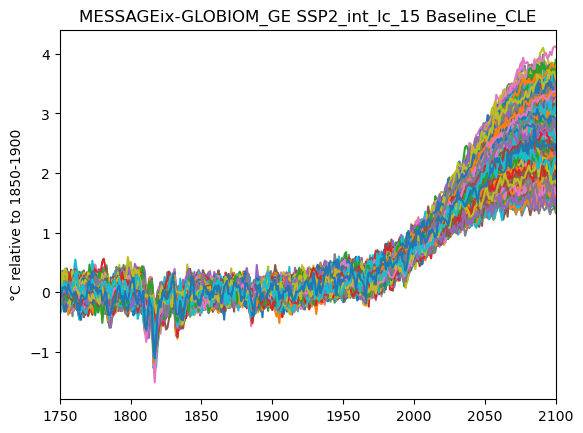

In [ ]:
pl.plot(ds.year, ds.temperature[:, 0, :]);
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15 Baseline_CLE")
pl.xlim(1750, 2100)
pl.ylabel('°C relative to 1850-1900');

In [5]:
pl.plot(ds.year, ds.temperature[:, 1, :]);
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15 MFR_tech_MC20_100")
pl.xlim(1750, 2100)
pl.ylabel('°C relative to 1850-1900');

In [6]:
ds.coords["scenario"]

<xarray.DataArray 'scenario' (scenario: 9)>
array(['Baseline_CLE', 'MFR_tech_MC20_100', 'MFR_tech_MCGT100',
       'MFR_tech_MCLE20', 'MFR_explore', 'MFR_fair', 'MFR_fossil',
       'MFR_behavior', 'MFR_develop'], dtype=object)
Coordinates:
  * scenario  (scenario) object 'Baseline_CLE' ... 'MFR_develop'

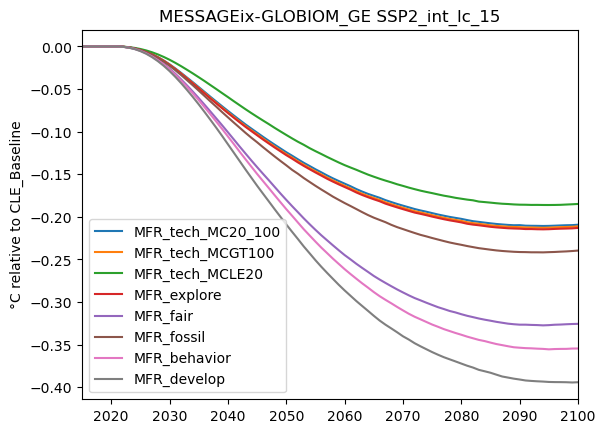

In [7]:
for iscen, scenario in enumerate(ds.coords["scenario"].values[1:]):
    pl.plot(ds.year[265:], np.median(ds.temperature[265:, iscen+1, :] - ds.temperature[265:, 0, :], axis=1), label=scenario);
pl.legend()
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15")
pl.ylabel('°C relative to CLE_Baseline');
pl.xlim(2015, 2100);

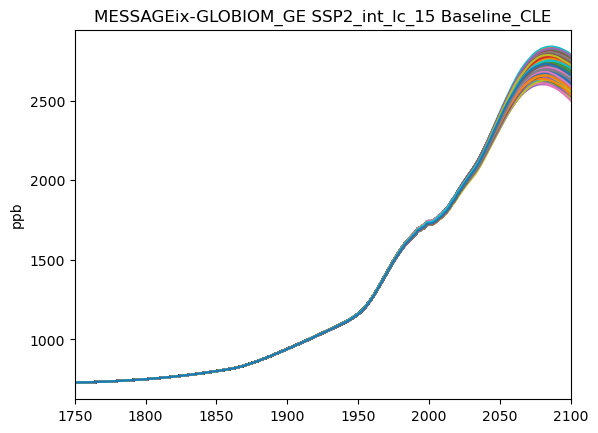

In [8]:
pl.plot(ds.year, ds.ch4_concentration[:, 0, :]);
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15 Baseline_CLE")
pl.xlim(1750, 2100)
pl.ylabel('ppb');

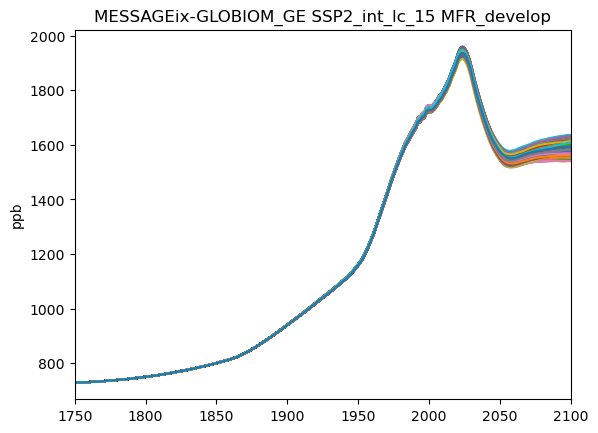

In [9]:
pl.plot(ds.year, ds.ch4_concentration[:, 5, :]);
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15 MFR_develop")
pl.xlim(1750, 2100)
pl.ylabel('ppb');

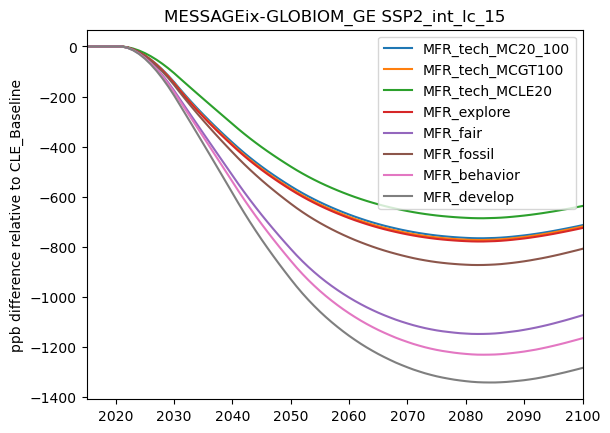

In [10]:
for iscen, scenario in enumerate(ds.coords["scenario"].values[1:]):
    pl.plot(ds.year[265:], np.median(ds.ch4_concentration[265:, iscen+1, :] - ds.ch4_concentration[265:, 0, :], axis=1), label=scenario);
pl.legend()
pl.title("MESSAGEix-GLOBIOM_GE SSP2_int_lc_15")
pl.ylabel('ppb difference relative to CLE_Baseline');
pl.xlim(2015, 2100);

## Check historical warming and uncertainty is in line with IPCC AR6

Pretty spot-on.

In [11]:
weights_21yr = np.ones(21)
weights_21yr[0] = 0.5
weights_21yr[-1] = 0.5

In [12]:
np.percentile(np.average(ds.temperature[245:266, 0, :], weights = weights_21yr, axis=0), (5, 50, 95))

array([0.71124008, 0.85142533, 0.99148057])

## Check present-day CH4 (2015-01-01, in baseline)

Meinshausen et al. 1836 ppb, IPCC 1829 ppb (both cases means of 2014 and 2015 assumed mid-year values). We're a little above this but not too bad.

Refer to calibration statistics at https://zenodo.org/record/7545157 to confirm that ERF difference w.r.t. AR6 assessment is minimal. 

In [13]:
np.percentile(ds.ch4_concentration[265, 0, :], (5, 50, 95))

array([1833.8710357 , 1843.84326732, 1852.9186993 ])

In [14]:
ds.close()